# Load Data

In [1]:
import pandas as pd

In [2]:
survey = pd.read_csv('D:\pandas sesh\Interview Questions Mailed By A Data Analytics Company(Data Science Lovers)\Survey Dataset - Technical Interview.csv')

survey

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


# How many samples were collected on each day ?

In [3]:
survey.dtypes

response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

In [4]:
survey['collection_date'].unique()

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [5]:
survey['collection_date'].nunique()

9

In [6]:
# Number of responds each day 
survey['collection_date'].value_counts(ascending = True)

5-31-2017     557
5-30-2017     582
5-26-2017     598
6-1-2017      607
5-29-2017     620
5-27-2017     665
5-28-2017     761
5-25-2017     998
5-24-2017    1479
Name: collection_date, dtype: int64

# what proportion of the total repondents were aged less than 45 ?

In [7]:
survey['age'].value_counts()

25      598
24      449
30      440
28      396
22      392
26      389
27      360
20      328
23      317
21      311
32      263
35      263
29      239
40      177
34      173
19      171
31      159
33      143
38      135
36      127
18      125
42      104
37       90
45       82
43       72
39       69
50       60
41       54
44       54
48       35
47       34
46       32
49       27
52       24
51       23
55       20
60       15
53       12
61       12
54       11
57       10
56        9
58        9
64        8
67        7
62        5
59        5
65        5
68        4
63        4
66        4
70        3
71        2
74        1
24ko      1
69        1
99        1
72        1
75        1
76        1
Name: age, dtype: int64

In [8]:
# replacing the value 24ko with 24


survey['age'] = survey['age'].replace('24ko' , '24')
survey['age'].value_counts()

25    598
24    450
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    104
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
56      9
58      9
64      8
67      7
59      5
65      5
62      5
66      4
68      4
63      4
70      3
71      2
74      1
69      1
99      1
72      1
75      1
76      1
Name: age, dtype: int64

In [9]:
# changing data type from str to int to perform the comparison '<'


survey['age'] = survey.age.astype(int)

In [10]:
survey.age.dtype

dtype('int32')

In [11]:
# The percentage is 93.18%


((survey[survey['age'] < 45].shape[0])/survey.shape[0]) * 100

93.18479685452162

# Creating intervals of age next to 'age' col, intervals: (18-25 , 25-40 , 40-55 , 55+)

In [12]:
data = survey.copy()

In [13]:
data.insert(10 ,'age_group',survey.age)
data.head(5)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505


In [14]:
bins = [18,25,40,55,60]
data['age_group'] = pd.cut(survey['age'] ,bins , labels = ['18-25', '25-40' , '40-55' , '55+'])
data

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,18-25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,25-40,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,18-25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,25-40,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,18-25,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,18-25,Male,243,Gen,0.080137


In [15]:
How many samples were collected for each age-group? , which age-group had the most samples?

Object `samples` not found.


In [16]:
data['age_group'].value_counts()

# 3423 samples were collected from the age interval 25-40 which has the most samples

25-40    3423
18-25    2567
40-55     644
55+        48
Name: age_group, dtype: int64

# What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote question ?

In [17]:
survey.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [18]:
RJD = survey[(survey['Vote_Now'] == 'RJD') & (survey['Past_Vote'] == 'RJD')]
RJD

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
9,10,5-24-2017,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738
19,20,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383
21,22,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,6-1-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757
6848,6849,6-1-2017,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389
6858,6859,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926
6860,6861,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469


In [19]:
(RJD.shape[0]/survey.shape[0]) * 100

# RJD party had 11% of the total votes

11.810106305519149

# What is the proportion of respondents who were fully satisfied with the performance of the CM for each day ?

In [20]:
survey['CM_satisfaction'].unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [21]:
CM = survey[survey['CM_satisfaction'] == 'Fully Satisfied']
CM

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477
17,18,5-24-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242
28,29,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,6-1-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990
6852,6853,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [22]:
a = CM.collection_date.value_counts()

In [23]:
b = survey.collection_date.value_counts()

In [24]:
(a/b) * 100

# Proportion of fully satisfied respondents out of all respondents

5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
Name: collection_date, dtype: float64

# What is the proportion of respondents who were fully dissatisfied with the performance of the MLA for each day? , Create a line plot of the results 

In [25]:
data.MLA_satisfaction.unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [26]:
dis_MLA = data[data['MLA_satisfaction'] == 'Fully Dissatisfied']
dis_MLA

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419
5,6,5-24-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,25-40,Male,178,Gen,0.382603
6,7,5-24-2017,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,25-40,Male,172,BC,0.521283
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6855,6856,6-1-2017,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",NOTA,JD(U),Fully Dissatisfied,Fully Dissatisfied,30,25-40,Male,241,EBC,0.174156
6857,6858,6-1-2017,Rural,12th Pass,"BPL/Below ₹ 5,000",RJJP,BJP,Fully Dissatisfied,Fully Dissatisfied,22,18-25,Male,168,Gen,0.085758
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,18-25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,25-40,Male,169,BC,0.252780


In [27]:
t = dis_MLA.collection_date.value_counts()
t

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64

In [28]:
h = data.collection_date.value_counts()
h

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

In [29]:
f= (t/h) * 100
f

5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
Name: collection_date, dtype: float64

In [30]:
g = pd.DataFrame(f)
g

,collection_date
5-24-2017,59.972955
5-25-2017,63.126253
5-26-2017,59.030100
5-27-2017,60.601504
5-28-2017,60.709593
5-29-2017,56.451613
5-30-2017,62.027491
5-31-2017,57.630162
6-1-2017,63.426689


In [31]:
type(g)

pandas.core.frame.DataFrame

<Axes: title={'center': 'MLA-dissatisfaction Line Plot'}>

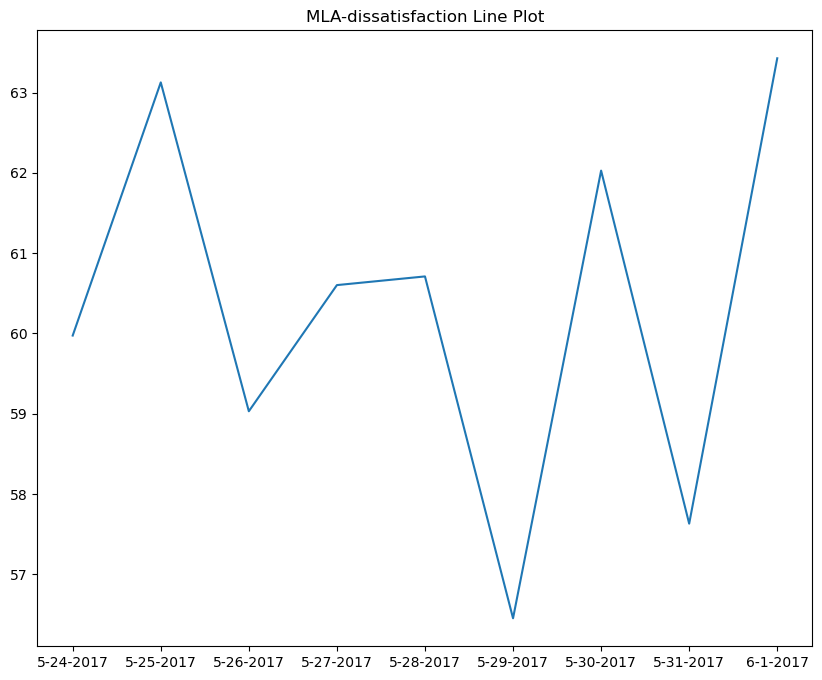

In [32]:
g.collection_date.plot(kind = 'line',title = 'MLA-dissatisfaction Line Plot', figsize = (10,8))

# Create a pivot table with index as Past_vote,column as Vote_Now and cell values as the count of samples

In [33]:
survey.pivot_table(index = 'Past_Vote' , columns = 'Vote_Now' , aggfunc = 'count')

CM_satisfaction                                              \
Vote_Now                 AAP AIMIM     BJP  BSP  HAM   INC JAP(L)  JD(U)   
Past_Vote                                                                  
BJP                      7.0   1.0  1630.0  3.0  5.0  42.0  101.0  110.0   
BSP                      NaN   1.0     2.0  5.0  NaN   1.0    NaN    NaN   
Did not vote             8.0   5.0   231.0  2.0  1.0  22.0   41.0   69.0   
HAM                      2.0   NaN    25.0  NaN  1.0   NaN    3.0    2.0   
INC                      NaN   6.0     6.0  NaN  NaN  57.0   10.0    9.0   
JAP(L)                   NaN   NaN     4.0  NaN  NaN   NaN   35.0    NaN   
JD(U)                    6.0  10.0   254.0  2.0  2.0  45.0   72.0  279.0   
LJP                      NaN   NaN    76.0  1.0  NaN   4.0    3.0    6.0   
Left Front               NaN   1.0     2.0  NaN  NaN   1.0    NaN    NaN   
NOTA                     NaN   1.0    29.0  1.0  NaN   9.0    7.0    7.0   
Others                   1.0   5.0    45.0  1.0  1.0   4.0    7.0    4.0   
RJD                      3.0   7.0    46.0  NaN  1.0  31.0   31.0   39.0   
RLSP                     NaN   NaN    17.0  NaN  NaN   NaN    3.0    NaN   
VIP                      NaN   NaN     NaN  NaN  NaN   NaN    NaN    1.0   

                               ... weight                                   \
Vote_Now       LJP Left Front  ...    LJP Left Front   NOTA Others Plurals   
Past_Vote                      ...                                           
BJP           44.0       13.0  ...   44.0       13.0  194.0   32.0    87.0   
BSP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   
Did not vote  10.0       16.0  ...   10.0       16.0   83.0   11.0    51.0   
HAM            2.0        NaN  ...    2.0        NaN    4.0    NaN     NaN   
INC            NaN        3.0  ...    NaN        3.0    6.0    3.0     3.0   
JAP(L)         NaN        NaN  ...    NaN        NaN    NaN    1.0     NaN   
JD(U)         29.0        9.0  ...   29.0        9.0   90.0   18.0    43.0   
LJP            9.0        2.0  ...    9.0        2.0    3.0    NaN     2.0   
Left Front     NaN       18.0  ...    NaN       18.0    1.0    1.0     NaN   
NOTA           3.0        5.0  ...    3.0        5.0   46.0    7.0    11.0   
Others         1.0        4.0  ...    1.0        4.0   10.0    6.0     8.0   
RJD            4.0        9.0  ...    4.0        9.0   18.0    8.0    10.0   
RLSP           NaN        NaN  ...    NaN        NaN    3.0    NaN     2.0   
VIP            NaN        NaN  ...    NaN        NaN    NaN    NaN     NaN   

                                                 
Vote_Now        RJD  RJJP  RLSP Undecided   VIP  
Past_Vote                                        
BJP           370.0  88.0  24.0      62.0  10.0  
BSP             NaN   NaN   NaN       NaN   NaN  
Did not vote  195.0  20.0   3.0      31.0   5.0  
HAM             6.0   4.0   NaN       1.0   NaN  
INC           100.0   1.0   2.0       7.0   NaN  
JAP(L)          2.0   NaN   NaN       NaN   NaN  
JD(U)         435.0  13.0  25.0      36.0   6.0  
LJP            17.0   1.0   NaN       1.0   NaN  
Left Front      4.0   NaN   1.0       NaN   1.0  
NOTA           27.0   5.0   4.0       5.0   NaN  
Others         21.0   7.0   1.0       6.0   NaN  
RJD           811.0   1.0  10.0      14.0   4.0  
RLSP            8.0   2.0  12.0       1.0   1.0  
VIP             NaN   NaN   NaN       NaN   1.0  

[14 rows x 216 columns]

# Create a datadrame by performing a group by over age_group & calculate the count of total samples under each age_group

In [34]:
df = data.groupby('age_group').count()
df

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,
18-25,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567,2567
25-40,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423
40-55,644,644,644,644,644,644,644,644,644,644,644,644,644,644
55+,48,48,48,48,48,48,48,48,48,48,48,48,48,48


In [35]:
type(df)

pandas.core.frame.DataFrame

# create a df by performing a group by over age_group & find the count of total samples for each age_group that opted for the JD(U) party in Vote_Now

In [36]:
JDU = data[data['Vote_Now'] == 'JD(U)']
JDU

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
13,14,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,25-40,Male,184,Gen,0.275509
28,29,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,40-55,Male,205,BC,1.337935
29,30,5-24-2017,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,25-40,Male,172,BC,0.405708
59,60,5-24-2017,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,40-55,Male,171,BC,2.824391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,6770,5-31-2017,Rural,12th Pass,"₹ 80,000 - ₹ 1,50,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,46,40-55,Male,166,BC,3.233006
6787,6788,6-1-2017,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,55+,Male,144,SC,4.741094
6829,6830,6-1-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,40-55,Male,146,EBC,6.328899
6843,6844,6-1-2017,Urban,Post - Graduation,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Satisfied,24,18-25,Male,241,BC,0.492241


In [37]:
JDU_series = JDU.groupby('age_group').count()['Vote_Now']
JDU_series

age_group
18-25    199
25-40    245
40-55     55
55+        4
Name: Vote_Now, dtype: int64

In [38]:
JDU_df = pd.DataFrame(JDU_series)
JDU_df

,Vote_Now
age_group,
18-25,199
25-40,245
40-55,55
55+,4
